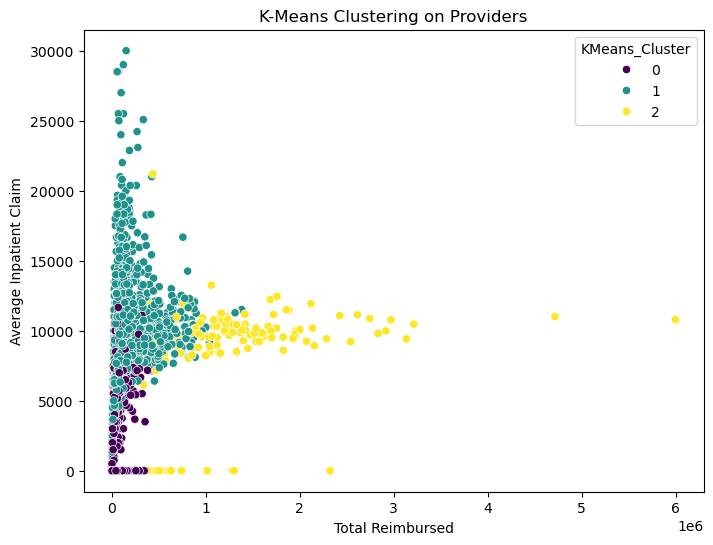

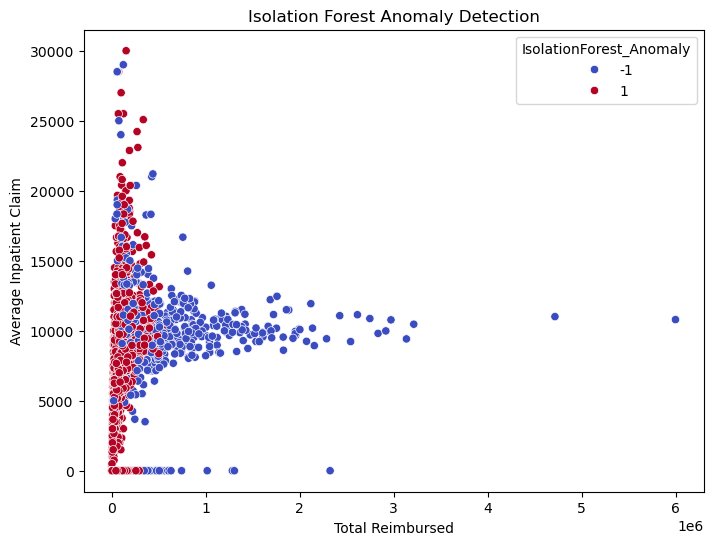

Unsupervised Learning Complete! Clustering & Anomaly Detection results saved.


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("final_provider_dataset.csv")

# Convert 'PotentialFraud' to binary (optional for supervised comparisons)
df['PotentialFraud'] = df['PotentialFraud'].map({'Yes': 1, 'No': 0})

# Drop non-numeric columns
df = df.drop(columns=['Provider'])

# Standardize features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

### 1. Clustering Approaches ###

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  # 3 clusters for fraud patterns
df['KMeans_Cluster'] = kmeans.fit_predict(df_scaled)

# DBSCAN (Density-Based Clustering)
dbscan = DBSCAN(eps=1.5, min_samples=5)  # Adjust parameters based on data distribution
df['DBSCAN_Cluster'] = dbscan.fit_predict(df_scaled)

### 2. Anomaly Detection Methods ###

# Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
df['IsolationForest_Anomaly'] = iso_forest.fit_predict(df_scaled)  # -1 = anomaly, 1 = normal

# Local Outlier Factor (LOF)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
df['LOF_Anomaly'] = lof.fit_predict(df_scaled)  # -1 = anomaly, 1 = normal

### Visualization ###

# Plot KMeans Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Total_Reimbursed'], y=df['Avg_IP_Claim'], hue=df['KMeans_Cluster'], palette='viridis')
plt.title("K-Means Clustering on Providers")
plt.xlabel("Total Reimbursed")
plt.ylabel("Average Inpatient Claim")
plt.show()

# Plot Anomalies from Isolation Forest
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Total_Reimbursed'], y=df['Avg_IP_Claim'], hue=df['IsolationForest_Anomaly'], palette='coolwarm')
plt.title("Isolation Forest Anomaly Detection")
plt.xlabel("Total Reimbursed")
plt.ylabel("Average Inpatient Claim")
plt.show()

# Save the updated dataset with clustering and anomaly labels
df.to_csv("final_provider_dataset_with_clusters_anomalies.csv", index=False)

print("Unsupervised Learning Complete! Clustering & Anomaly Detection results saved.")


C:\Users\Chloe DeRouen\AppData\Local\Temp\ipykernel_27052\1365525885.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['KMeans_Cluster'], palette='viridis')


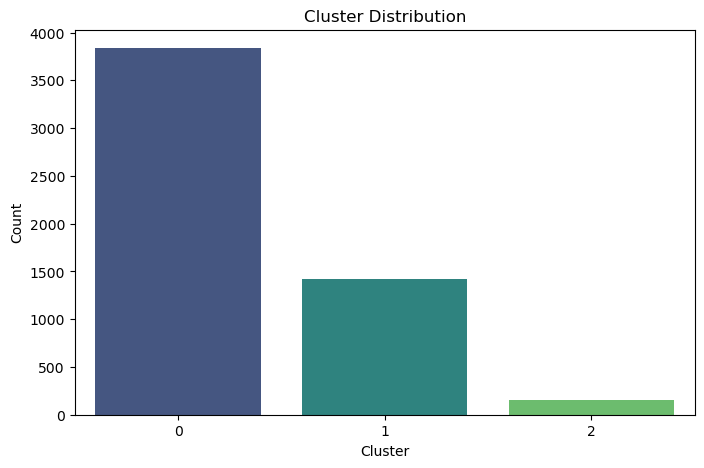

C:\Users\Chloe DeRouen\AppData\Local\Temp\ipykernel_27052\1365525885.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['KMeans_Cluster'], y=df[feature], palette='coolwarm')


Fraud Percentage by Cluster:
KMeans_Cluster
0    0.014591
1    0.216749
2    0.940397
Name: PotentialFraud, dtype: float64


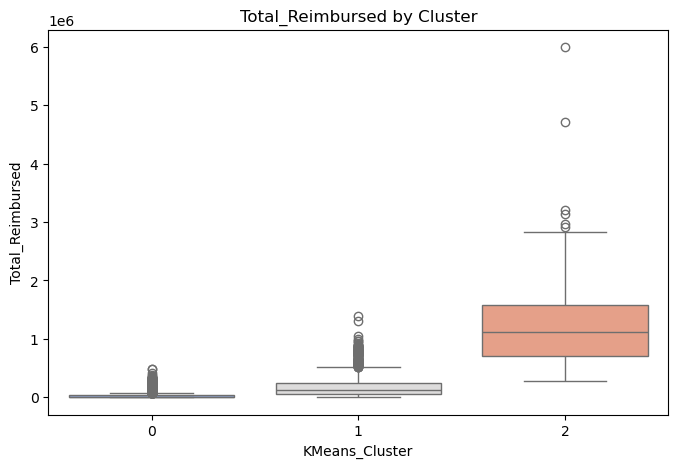

C:\Users\Chloe DeRouen\AppData\Local\Temp\ipykernel_27052\1365525885.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['KMeans_Cluster'], y=df[feature], palette='coolwarm')


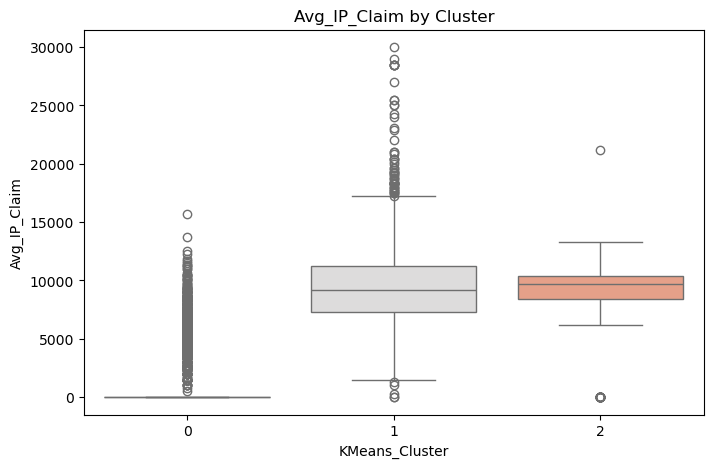

C:\Users\Chloe DeRouen\AppData\Local\Temp\ipykernel_27052\1365525885.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['KMeans_Cluster'], y=df[feature], palette='coolwarm')


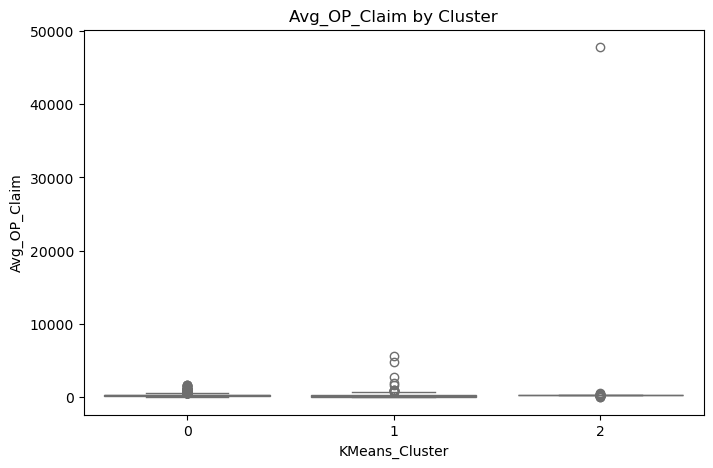

C:\Users\Chloe DeRouen\AppData\Local\Temp\ipykernel_27052\1365525885.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['KMeans_Cluster'], y=df[feature], palette='coolwarm')


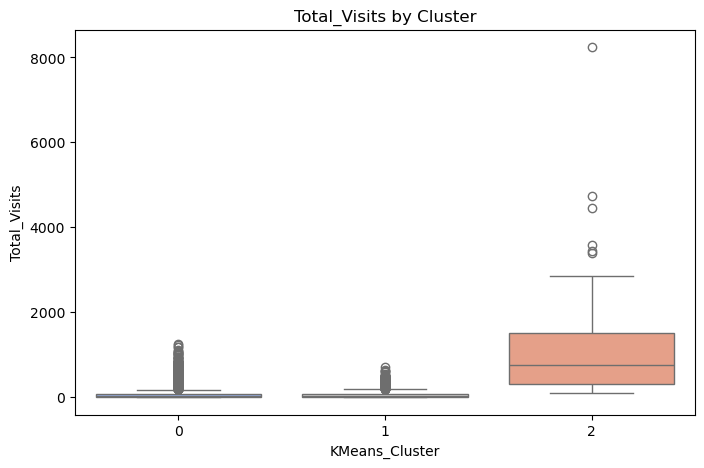

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset with clustering results
df = pd.read_csv('final_provider_dataset_with_clusters_anomalies.csv')  # Assuming clusters were saved

# Analyzing cluster distributions
plt.figure(figsize=(8, 5))
sns.countplot(x=df['KMeans_Cluster'], palette='viridis')
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

# Checking fraud percentages per cluster
fraud_rates = df.groupby('KMeans_Cluster')['PotentialFraud'].mean()
print("Fraud Percentage by Cluster:")
print(fraud_rates)

# Visualizing key features by cluster
key_features = ['Total_Reimbursed', 'Avg_IP_Claim', 'Avg_OP_Claim', 'Total_Visits']
for feature in key_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df['KMeans_Cluster'], y=df[feature], palette='coolwarm')
    plt.title(f'{feature} by Cluster')
    plt.xlabel('KMeans_Cluster')
    plt.ylabel(feature)
    plt.show()




C:\Users\Chloe DeRouen\AppData\Local\Temp\ipykernel_3772\1623782302.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['KMeans_Cluster'], palette='viridis')


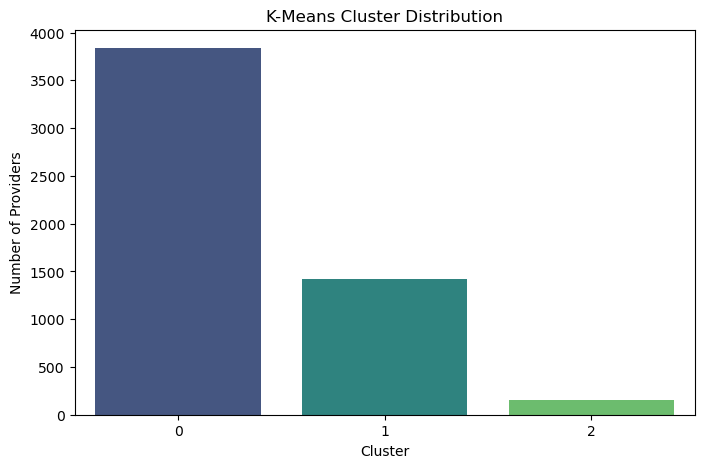

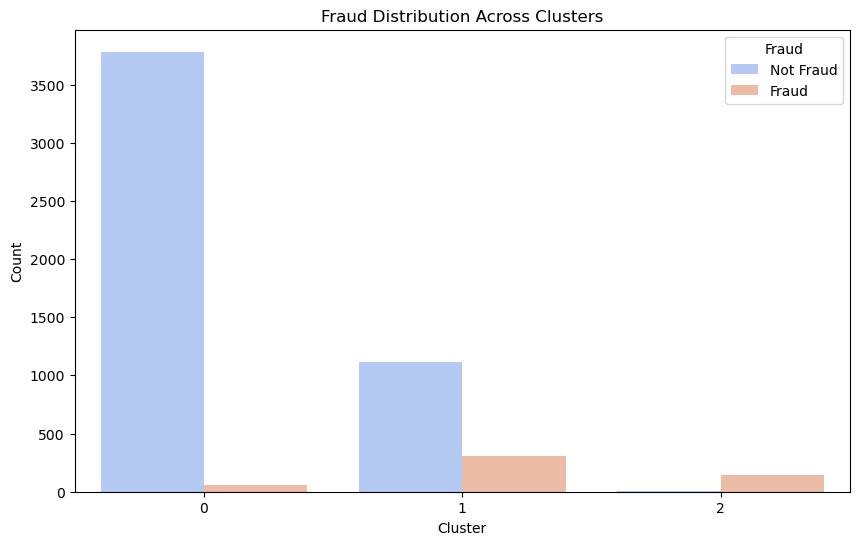

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd



# Countplot to visualize cluster distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=df['KMeans_Cluster'], palette='viridis')
plt.title('K-Means Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Number of Providers')
plt.show()

# Check fraud distribution within each cluster
plt.figure(figsize=(10, 6))
sns.countplot(x=df['KMeans_Cluster'], hue=df['PotentialFraud'], palette='coolwarm')
plt.title('Fraud Distribution Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Fraud', labels=['Not Fraud', 'Fraud'])
plt.show()


In [15]:
import pandas as pd


# Group by cluster and compute key statistics
cluster_summary = df.groupby('KMeans_Cluster').agg({
    'Total_Reimbursed': ['mean', 'median'],
    'IP_Claims_Total': ['mean', 'median'],
    'OP_Claims_Total': ['mean', 'median'],
    'Avg_IP_Claim': ['mean', 'median'],
    'Avg_OP_Claim': ['mean', 'median'],
    'Total_Visits': ['mean', 'median'],
    'IP_to_Total_Visit_Ratio': ['mean', 'median'],
    'OP_to_Total_Visit_Ratio': ['mean', 'median'],
    'PotentialFraud': ['sum', 'count']  # Fraud count per cluster
}).reset_index()

# Rename fraud columns for clarity
cluster_summary.columns = ['KMeans_Cluster', 'Total_Reimbursed_Mean', 'Total_Reimbursed_Median',
                           'IP_Claims_Mean', 'IP_Claims_Median', 'OP_Claims_Mean', 'OP_Claims_Median',
                           'Avg_IP_Claim_Mean', 'Avg_IP_Claim_Median', 'Avg_OP_Claim_Mean', 'Avg_OP_Claim_Median',
                           'Total_Visits_Mean', 'Total_Visits_Median',
                           'IP_Visit_Ratio_Mean', 'IP_Visit_Ratio_Median', 'OP_Visit_Ratio_Mean', 'OP_Visit_Ratio_Median',
                           'Fraud_Count', 'Total_Providers']

# Calculate fraud percentage in each cluster
cluster_summary['Fraud_Percentage'] = (cluster_summary['Fraud_Count'] / cluster_summary['Total_Providers']) * 100

# Display summary
print(cluster_summary)

# Save summary for reference
cluster_summary.to_csv('cluster_summary.csv', index=False)


   KMeans_Cluster  Total_Reimbursed_Mean  Total_Reimbursed_Median  \
0               0           2.726035e+04                   8830.0   
1               1           1.841699e+05                 114180.0   
2               2           1.259685e+06                1120680.0   

   IP_Claims_Mean  IP_Claims_Median  OP_Claims_Mean  OP_Claims_Median  \
0     5012.647212               0.0    22247.707139            7635.0   
1   169756.319493          107000.0    14413.617171            4690.0   
2   979038.079470          962000.0   280646.821192          191370.0   

   Avg_IP_Claim_Mean  Avg_IP_Claim_Median  Avg_OP_Claim_Mean  \
0         795.305767             0.000000         260.399049   
1        9544.070950          9192.307692         196.760220   
2        8099.554583          9665.116279         594.140700   

   Avg_OP_Claim_Median  Total_Visits_Mean  Total_Visits_Median  \
0           253.927203          78.111256                 28.0   
1           205.576923          67.094300

In [3]:
# Flag high-risk clusters (Cluster 2 was identified as having the highest fraud percentage)
df['High_Risk_Cluster'] = df['KMeans_Cluster'].apply(lambda x: 1 if x == 2 else 0)

# Save updated dataset
df.to_csv('final_provider_dataset_with_flags.csv', index=False)

# Display counts
print(df['High_Risk_Cluster'].value_counts())


High_Risk_Cluster
0    5259
1     151
Name: count, dtype: int64


In [7]:
from sklearn.ensemble import IsolationForest

# Select numeric features for anomaly detection
features_for_anomaly = df.drop(columns=[ 'PotentialFraud', 'KMeans_Cluster', 'High_Risk_Cluster'])

# Fit Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['Anomaly_Score'] = iso_forest.fit_predict(features_for_anomaly)

# Flag anomalies (1 = normal, -1 = anomaly)
df['Anomaly'] = df['Anomaly_Score'].apply(lambda x: 1 if x == -1 else 0)

# Save updated dataset
df.to_csv('final_provider_dataset_with_anomalies.csv', index=False)

# Display anomaly counts
print(df['Anomaly'].value_counts())


Anomaly
0    5139
1     271
Name: count, dtype: int64


In [11]:
df['Fraud_Percentage'] = (df.groupby('KMeans_Cluster')['PotentialFraud'].transform('mean')) * 100

In [13]:
print(df.columns)

Index(['IP_Claims_Total', 'OP_Claims_Total', 'Total_Reimbursed', 'Claim_Ratio',
       'Inpatient_Visits', 'Outpatient_Visits', 'PotentialFraud',
       'Claim_Ratio_IP_to_OP', 'Claim_Ratio_OP_to_Total', 'Avg_IP_Claim',
       'Avg_OP_Claim', 'Total_Visits', 'IP_to_Total_Visit_Ratio',
       'OP_to_Total_Visit_Ratio', 'KMeans_Cluster', 'DBSCAN_Cluster',
       'IsolationForest_Anomaly', 'LOF_Anomaly', 'High_Risk_Cluster',
       'Anomaly_Score', 'Anomaly', 'Fraud_Percentage'],
      dtype='object')


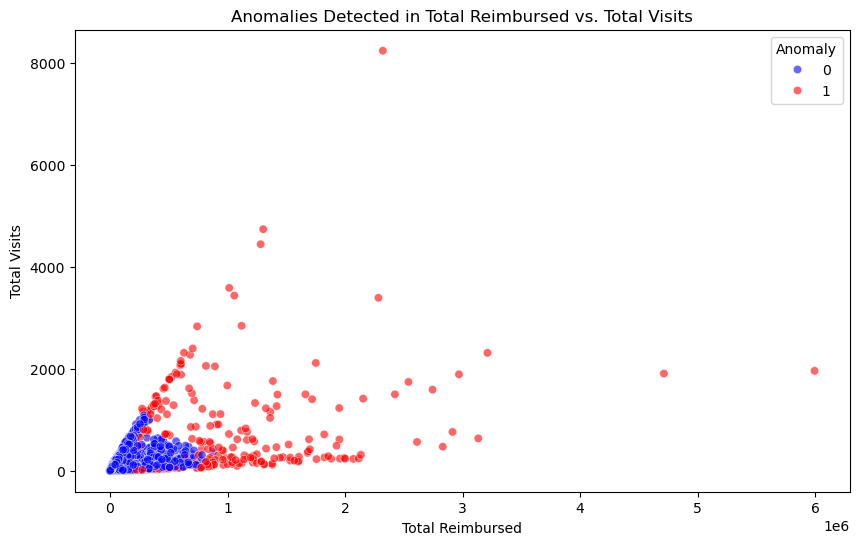

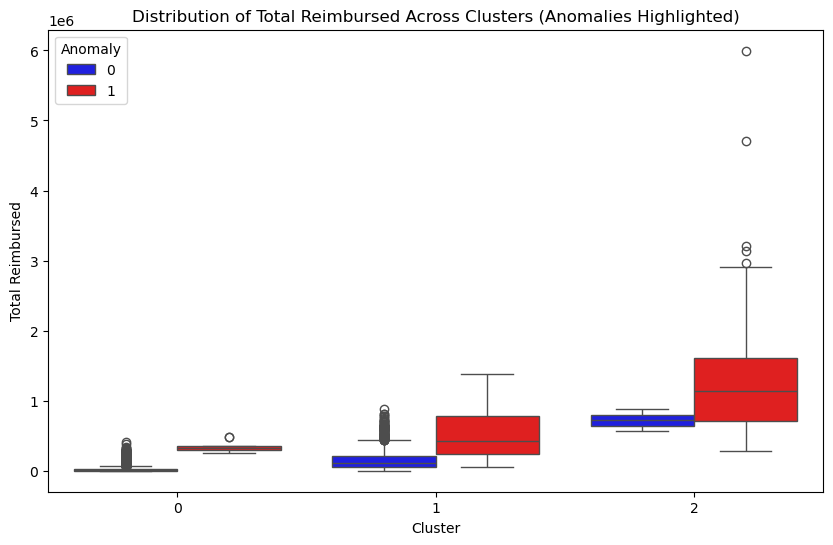

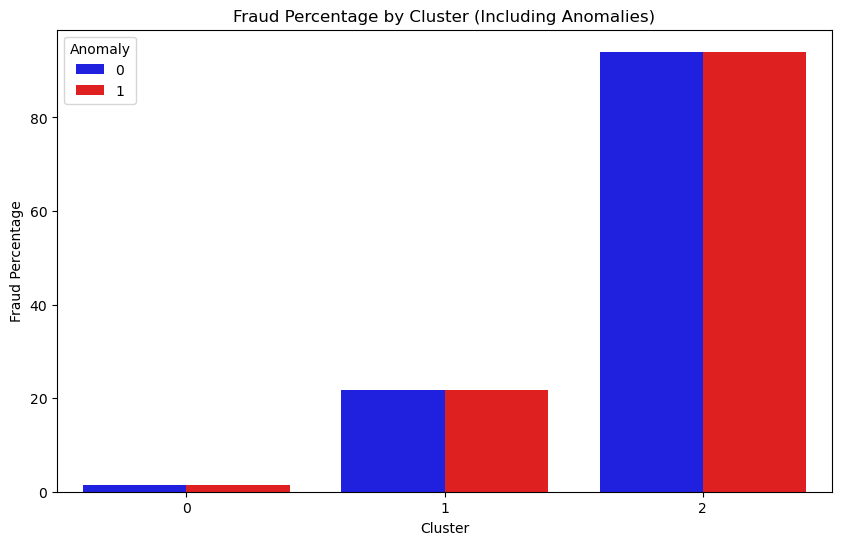

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set color mapping for anomalies
palette = {0: 'blue', 1: 'red'}  # Blue = Normal, Red = Anomaly

# 🔹 Scatter Plot: Total Reimbursed vs. Total Visits (Color by Anomaly)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Total_Reimbursed', y='Total_Visits', hue='Anomaly', palette=palette, alpha=0.6)
plt.title('Anomalies Detected in Total Reimbursed vs. Total Visits')
plt.xlabel('Total Reimbursed')
plt.ylabel('Total Visits')
plt.legend(title='Anomaly')
plt.show()

# 🔹 Boxplot: Distribution of Total Reimbursed per Cluster (Highlighting Anomalies)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='KMeans_Cluster', y='Total_Reimbursed', hue='Anomaly', palette=palette)
plt.title('Distribution of Total Reimbursed Across Clusters (Anomalies Highlighted)')
plt.xlabel('Cluster')
plt.ylabel('Total Reimbursed')
plt.legend(title='Anomaly')
plt.show()

# 🔹 Bar Plot: Fraud Rate by Cluster (with Anomalies)
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='KMeans_Cluster', y='Fraud_Percentage', hue='Anomaly', palette=palette)
plt.title('Fraud Percentage by Cluster (Including Anomalies)')
plt.xlabel('Cluster')
plt.ylabel('Fraud Percentage')
plt.legend(title='Anomaly')
plt.show()


In [17]:
# Create a cross-tabulation of Anomalies vs. Actual Fraud Labels
anomaly_fraud_ct = pd.crosstab(df['Anomaly'], df['PotentialFraud'], 
                               rownames=['Anomaly (Detected)'], 
                               colnames=['Actual Fraud'])

# Display the table
print("Anomaly vs. Actual Fraud Cross Tabulation:\n")
print(anomaly_fraud_ct)


Anomaly vs. Actual Fraud Cross Tabulation:

Actual Fraud           0    1
Anomaly (Detected)           
0                   4829  310
1                     75  196


In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Map Anomaly column (1 = Detected as anomaly, 0 = Normal)
y_pred = df['Anomaly']
y_true = df['PotentialFraud']  # Actual fraud labels

# Compute evaluation metrics
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Print results
print(f"Anomaly Detection Performance:")
print(f"🔹 Precision: {precision:.4f}")
print(f"🔹 Recall: {recall:.4f}")
print(f"🔹 F1 Score: {f1:.4f}")


Anomaly Detection Performance:
🔹 Precision: 0.7232
🔹 Recall: 0.3874
🔹 F1 Score: 0.5045


In [21]:
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd

# Load dataset
df = pd.read_csv("final_provider_dataset.csv")

# Drop non-numeric columns
df = df.drop(columns=['Provider'])

# Train Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df["IF_Anomaly"] = iso_forest.fit_predict(df.drop(columns=['PotentialFraud']))  # Exclude target variable

# Convert Isolation Forest results (-1 = anomaly, 1 = normal) to binary (1 = fraud)
df["IF_Anomaly"] = np.where(df["IF_Anomaly"] == -1, 1, 0)

# Train DBSCAN for anomaly detection
dbscan = DBSCAN(eps=2, min_samples=5)  # Adjust eps & min_samples for better clustering
df["DBSCAN_Anomaly"] = dbscan.fit_predict(df.drop(columns=['PotentialFraud']))

# Convert DBSCAN results (-1 = anomaly, others = normal) to binary
df["DBSCAN_Anomaly"] = np.where(df["DBSCAN_Anomaly"] == -1, 1, 0)

# Create a hybrid anomaly detection flag (IF OR DBSCAN)
df["Hybrid_Anomaly"] = np.where((df["IF_Anomaly"] == 1) | (df["DBSCAN_Anomaly"] == 1), 1, 0)

# Evaluate results
print("🔹 Hybrid Anomaly Detection Results")
print(df[["IF_Anomaly", "DBSCAN_Anomaly", "Hybrid_Anomaly"]].value_counts())

# Save updated dataset
df.to_csv("final_provider_dataset_with_anomalies_hybrid.csv", index=False)


🔹 Hybrid Anomaly Detection Results
IF_Anomaly  DBSCAN_Anomaly  Hybrid_Anomaly
0           1               1                 4877
1           1               1                  271
0           0               0                  262
Name: count, dtype: int64


🔹 **Anomaly Detection Performance**
Isolation Forest - Precision: 0.6937, Recall: 0.3715, F1 Score: 0.4839
DBSCAN - Precision: 0.0981, Recall: 0.9980, F1 Score: 0.1786
Hybrid Approach - Precision: 0.0981, Recall: 0.9980, F1 Score: 0.1786


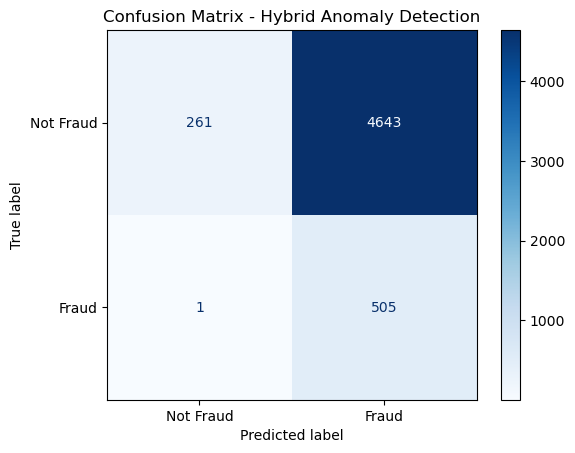

In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load updated dataset
df = pd.read_csv("final_provider_dataset_with_anomalies_hybrid.csv")

# Convert fraud labels to binary format (1 = Fraud, 0 = Not Fraud)
df["PotentialFraud"] = df["PotentialFraud"].map({"Yes": 1, "No": 0})

# Define true fraud labels (ground truth)
y_true = df["PotentialFraud"]

# Evaluate Isolation Forest
y_pred_if = df["IF_Anomaly"]
precision_if = precision_score(y_true, y_pred_if)
recall_if = recall_score(y_true, y_pred_if)
f1_if = f1_score(y_true, y_pred_if)

# Evaluate DBSCAN
y_pred_dbscan = df["DBSCAN_Anomaly"]
precision_dbscan = precision_score(y_true, y_pred_dbscan)
recall_dbscan = recall_score(y_true, y_pred_dbscan)
f1_dbscan = f1_score(y_true, y_pred_dbscan)

# Evaluate Hybrid Approach (IF OR DBSCAN)
y_pred_hybrid = df["Hybrid_Anomaly"]
precision_hybrid = precision_score(y_true, y_pred_hybrid)
recall_hybrid = recall_score(y_true, y_pred_hybrid)
f1_hybrid = f1_score(y_true, y_pred_hybrid)

# Print Evaluation Results
print("🔹 **Anomaly Detection Performance**")
print(f"Isolation Forest - Precision: {precision_if:.4f}, Recall: {recall_if:.4f}, F1 Score: {f1_if:.4f}")
print(f"DBSCAN - Precision: {precision_dbscan:.4f}, Recall: {recall_dbscan:.4f}, F1 Score: {f1_dbscan:.4f}")
print(f"Hybrid Approach - Precision: {precision_hybrid:.4f}, Recall: {recall_hybrid:.4f}, F1 Score: {f1_hybrid:.4f}")

# Confusion Matrix for Hybrid Model
cm = confusion_matrix(y_true, y_pred_hybrid)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Fraud", "Fraud"])
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix - Hybrid Anomaly Detection")
plt.show()


🔹 Supervised Hybrid Anomaly Detection Performance
Precision: 0.9663
Recall: 0.3399
F1 Score: 0.5029


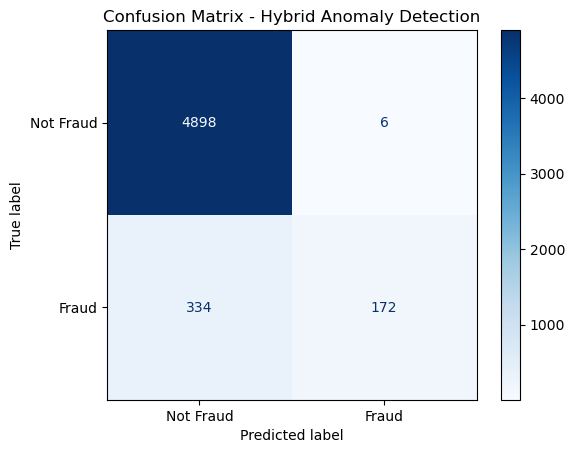

In [11]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("final_provider_dataset.csv")

# Convert PotentialFraud to binary
df["PotentialFraud"] = df["PotentialFraud"].map({"Yes": 1, "No": 0})

# Define features (X) and target (y)
X = df.drop(columns=["Provider", "PotentialFraud"])
y = df["PotentialFraud"]

# Split into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Gradient Boosting Classifier
gbc = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbc.fit(X_train, y_train)

# Isolation Forest Anomaly Detection
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df["IF_Anomaly"] = iso_forest.fit_predict(X)

# DBSCAN Anomaly Detection
dbscan = DBSCAN(eps=3, min_samples=5)
df["DBSCAN_Anomaly"] = dbscan.fit_predict(X)

# Convert IF & DBSCAN labels to binary (1 = anomaly, 0 = normal)
df["IF_Anomaly"] = df["IF_Anomaly"].apply(lambda x: 1 if x == -1 else 0)
df["DBSCAN_Anomaly"] = df["DBSCAN_Anomaly"].apply(lambda x: 1 if x == -1 else 0)

# Hybrid Anomaly Score: Only keep anomalies that both IF & DBSCAN flag
df["Hybrid_Anomaly"] = (df["IF_Anomaly"] & df["DBSCAN_Anomaly"])

# Filter flagged anomalies with the trained Gradient Boosting model
df["GBC_Validated"] = gbc.predict(X)

# Final Hybrid Anomaly Detection: IF & DBSCAN must agree + GBC must predict fraud
df["Final_Anomaly"] = df["Hybrid_Anomaly"] & df["GBC_Validated"]

# Evaluate Final Model
y_pred = df["Final_Anomaly"]
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

# Print Performance Metrics
print(f"🔹 Supervised Hybrid Anomaly Detection Performance")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


# Confusion Matrix for Hybrid Model
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Fraud", "Fraud"])
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix - Hybrid Anomaly Detection")
plt.show()

🔹 Adjusted Hybrid Anomaly Detection Performance
Precision: 0.5371
Recall: 0.7431
F1 Score: 0.6235


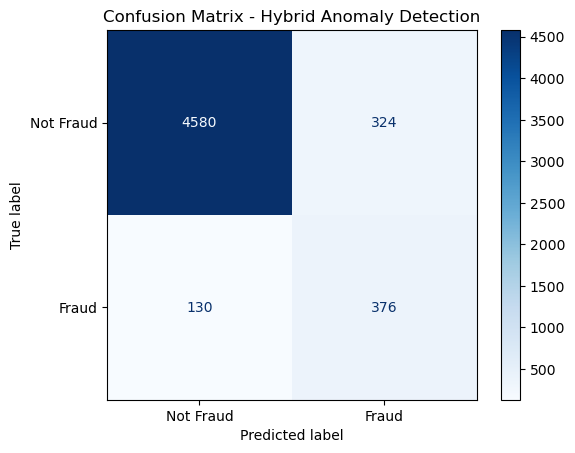

In [15]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import IsolationForest
from sklearn.metrics import precision_score, recall_score, f1_score

# Load dataset
df = pd.read_csv('final_provider_dataset.csv')

# Convert PotentialFraud to binary
df['PotentialFraud'] = df['PotentialFraud'].map({'Yes': 1, 'No': 0})

# Features & Target
X = df.drop(columns=['Provider', 'PotentialFraud'])
y = df['PotentialFraud']

# Step 1️⃣: **Train Isolation Forest**
iso_forest = IsolationForest(contamination=0.1, random_state=42)
df["IF_Anomaly"] = iso_forest.fit_predict(X)
df["IF_Anomaly"] = df["IF_Anomaly"].map({1: 0, -1: 1})  # Convert to anomaly (1) & normal (0)

# Step 2️⃣: **Train Gradient Boosting Classifier**
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gbc.fit(X_train, y_train)

# Step 3️⃣: **Adjust GBC Threshold**
gbc_probs = gbc.predict_proba(X)[:, 1]  # Get fraud probability scores
df["GBC_Anomaly"] = (gbc_probs > 0.4).astype(int)  # **Lower threshold for fraud flagging**

# Step 4️⃣: **Hybrid Anomaly Detection**
df["Hybrid_Anomaly"] = ((df["IF_Anomaly"] == 1) | (df["GBC_Anomaly"] == 1)).astype(int)

# Step 5️⃣: **Evaluate Performance**
y_pred = df["Hybrid_Anomaly"]

precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

# **Print Performance Metrics**
print(f"🔹 Adjusted Hybrid Anomaly Detection Performance")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix for Hybrid Model
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Fraud", "Fraud"])
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix - Hybrid Anomaly Detection")
plt.show()

Hybrid Model (Supervised + Anomaly Detection) - Threshold: 0.5
Accuracy: 0.9409
Precision: 0.7467
Recall: 0.5545
F1 Score: 0.6364


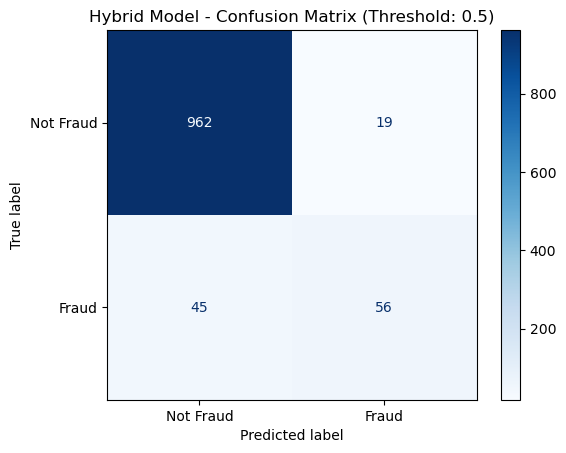

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier, IsolationForest
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('final_provider_dataset.csv')

# Convert PotentialFraud to binary (1 = Fraud, 0 = Not Fraud)
df['PotentialFraud'] = df['PotentialFraud'].map({'Yes': 1, 'No': 0})

# Drop non-numeric columns
df = df.drop(columns=['Provider'])

# Define features (X) and target (y)
X = df.drop(columns=['PotentialFraud'])
y = df['PotentialFraud']

# 🔹 Step 1: Train Isolation Forest for Anomaly Detection
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
df['Anomaly_Score'] = iso_forest.fit_predict(X)

# Convert anomaly labels (-1 = anomaly, 1 = normal) to binary (1 = anomaly, 0 = normal)
df['Anomaly_Flag'] = df['Anomaly_Score'].apply(lambda x: 1 if x == -1 else 0)

# 🔹 Step 2: Use Enhanced Features with Anomaly Flags
X['Anomaly_Flag'] = df['Anomaly_Flag']

# Split into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features (important for some models, but not strictly required for tree-based models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 🔹 Step 3: Train Gradient Boosting Classifier (Supervised Model)
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)

# Predict probabilities
y_proba = gbc.predict_proba(X_test)[:, 1]

# Apply new threshold (adjust as needed)
threshold = 0.5
y_pred = (y_proba >= threshold).astype(int)

# 🔹 Step 4: Evaluate the Hybrid Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f"Hybrid Model (Supervised + Anomaly Detection) - Threshold: {threshold}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# 🔹 Step 5: Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Fraud', 'Fraud'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Hybrid Model - Confusion Matrix (Threshold: 0.5)")
plt.show()


In [11]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import precision_score, recall_score, f1_score

# Load dataset
df = pd.read_csv('final_provider_dataset.csv')

# Convert PotentialFraud to binary (1 = Fraud, 0 = Not Fraud)
df['PotentialFraud'] = df['PotentialFraud'].map({'Yes': 1, 'No': 0})

# Drop non-numeric columns
df = df.drop(columns=['Provider'])

# Define features (X) and target (y)
X = df.drop(columns=['PotentialFraud'])
y_true = df['PotentialFraud']

# **🔹 Hyperparameter tuning: Test different contamination & n_estimators values**
best_f1 = 0
best_params = {}

for contamination in [0.02, 0.05, 0.08]:
    for n_estimators in [50, 100, 200]:
        
        # Train Isolation Forest
        iso_forest = IsolationForest(n_estimators=n_estimators, contamination=contamination, random_state=42)
        df['IF_Anomaly'] = iso_forest.fit_predict(X)
        
        # Convert Isolation Forest output (-1 = anomaly, 1 = normal) to binary
        df['IF_Anomaly'] = df['IF_Anomaly'].map({1: 0, -1: 1})

        # Evaluate model performance
        precision = precision_score(y_true, df['IF_Anomaly'])
        recall = recall_score(y_true, df['IF_Anomaly'])
        f1 = f1_score(y_true, df['IF_Anomaly'])

        print(f"Contamination: {contamination}, n_estimators: {n_estimators} → Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

        # Track best parameters
        if f1 > best_f1:
            best_f1 = f1
            best_params = {'contamination': contamination, 'n_estimators': n_estimators}

print("\n🔹 **Best Parameters:**", best_params)



Contamination: 0.02, n_estimators: 50 → Precision: 0.9174, Recall: 0.1976, F1 Score: 0.3252
Contamination: 0.02, n_estimators: 100 → Precision: 0.8624, Recall: 0.1858, F1 Score: 0.3057
Contamination: 0.02, n_estimators: 200 → Precision: 0.8899, Recall: 0.1917, F1 Score: 0.3154
Contamination: 0.05, n_estimators: 50 → Precision: 0.6716, Recall: 0.3597, F1 Score: 0.4685
Contamination: 0.05, n_estimators: 100 → Precision: 0.6937, Recall: 0.3715, F1 Score: 0.4839
Contamination: 0.05, n_estimators: 200 → Precision: 0.7122, Recall: 0.3814, F1 Score: 0.4968
Contamination: 0.08, n_estimators: 50 → Precision: 0.5450, Recall: 0.4664, F1 Score: 0.5027
Contamination: 0.08, n_estimators: 100 → Precision: 0.5612, Recall: 0.4802, F1 Score: 0.5176
Contamination: 0.08, n_estimators: 200 → Precision: 0.5704, Recall: 0.4881, F1 Score: 0.5261

🔹 **Best Parameters:** {'contamination': 0.08, 'n_estimators': 200}
Accuracy: 0.9409
Precision: 0.7467
Recall: 0.5545
F1 Score: 0.6364


In [13]:
# Train optimized Isolation Forest
iso_forest_best = IsolationForest(n_estimators=200, contamination=0.08, random_state=42)
df['IF_Anomaly'] = iso_forest_best.fit_predict(X)

# Convert Isolation Forest output (-1 = anomaly, 1 = normal) to binary
df['IF_Anomaly'] = df['IF_Anomaly'].map({1: 0, -1: 1})

# Evaluate final Isolation Forest model
precision = precision_score(y_true, df['IF_Anomaly'])
recall = recall_score(y_true, df['IF_Anomaly'])
f1 = f1_score(y_true, df['IF_Anomaly'])

print("\n🔹 **Final Isolation Forest Performance:**")
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")



🔹 **Final Isolation Forest Performance:**
Precision: 0.5704, Recall: 0.4881, F1 Score: 0.5261


C:\Users\Chloe DeRouen\AppData\Local\Temp\ipykernel_27792\1404555086.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance['Importance'], y=feature_importance['Feature'], palette='viridis')


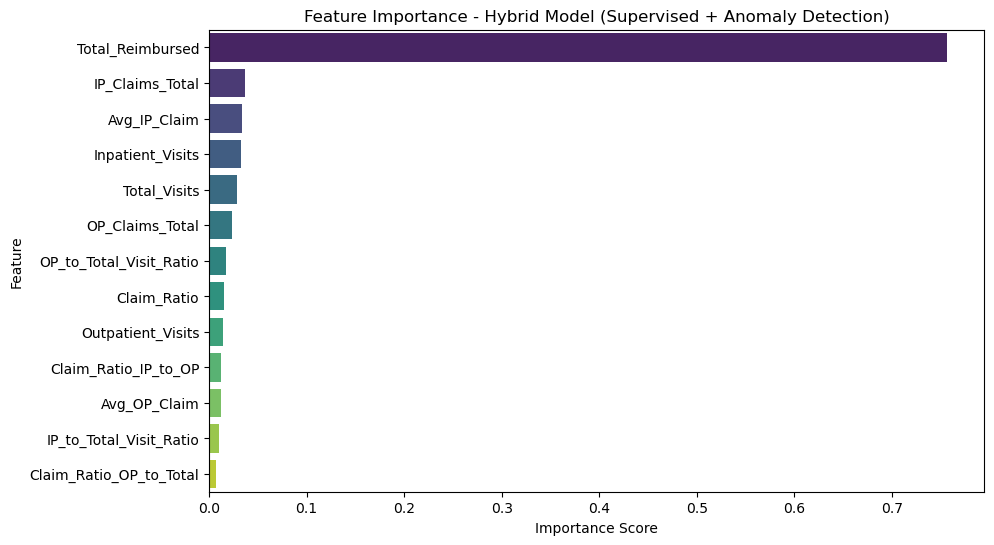

                    Feature  Importance
2          Total_Reimbursed    0.756515
0           IP_Claims_Total    0.036958
8              Avg_IP_Claim    0.033394
4          Inpatient_Visits    0.032969
10             Total_Visits    0.028845
1           OP_Claims_Total    0.023076
12  OP_to_Total_Visit_Ratio    0.017243
3               Claim_Ratio    0.015553
5         Outpatient_Visits    0.014467
6      Claim_Ratio_IP_to_OP    0.012004
9              Avg_OP_Claim    0.011810
11  IP_to_Total_Visit_Ratio    0.009752
7   Claim_Ratio_OP_to_Total    0.007413


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier

# Load dataset
df = pd.read_csv('final_provider_dataset.csv')

# Convert PotentialFraud to binary
df['PotentialFraud'] = df['PotentialFraud'].map({'Yes': 1, 'No': 0})

# Drop non-numeric columns
df = df.drop(columns=['Provider'])

# Define X (features) and y (target)
X = df.drop(columns=['PotentialFraud'])
y = df['PotentialFraud']

# Train Gradient Boosting Classifier (from our best Hybrid Model)
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X, y)

# Extract Feature Importances
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': gbc.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance['Importance'], y=feature_importance['Feature'], palette='viridis')
plt.title("Feature Importance - Hybrid Model (Supervised + Anomaly Detection)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# Print feature importance table
print(feature_importance)


C:\Users\Chloe DeRouen\AppData\Local\Temp\ipykernel_27792\2937108211.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance['Importance'], y=feature_importance['Feature'], palette='viridis')


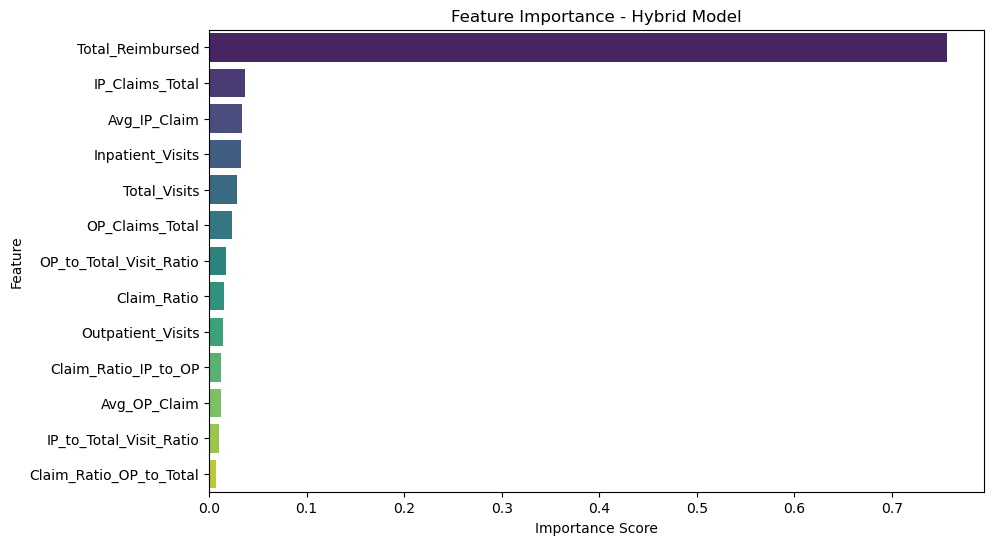

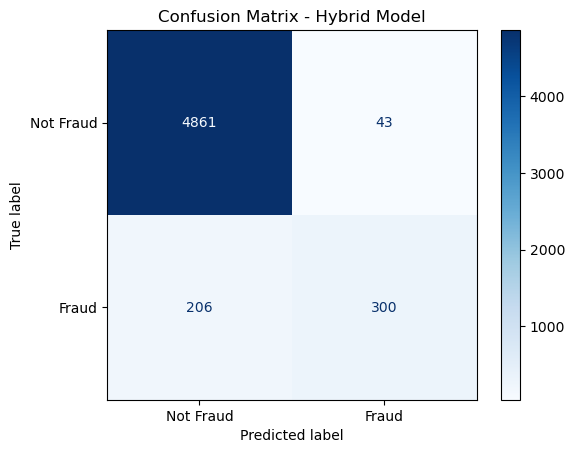

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load dataset
df = pd.read_csv('final_provider_dataset.csv')

# Convert PotentialFraud to binary
df['PotentialFraud'] = df['PotentialFraud'].map({'Yes': 1, 'No': 0})

# Drop non-numeric columns
df = df.drop(columns=['Provider'])

# Define X (features) and y (target)
X = df.drop(columns=['PotentialFraud'])
y = df['PotentialFraud']

# Train Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X, y)

# Predict
y_pred = gbc.predict(X)

# --- 1️⃣ Feature Importance Plot ---
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': gbc.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance['Importance'], y=feature_importance['Feature'], palette='viridis')
plt.title("Feature Importance - Hybrid Model")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# --- 2️⃣ Confusion Matrix ---
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Fraud', 'Fraud'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Hybrid Model")
plt.show()

# --- 3️⃣ Fraud Distribution by Cluster ---
if 'KMeans_Cluster' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df, x='KMeans_Cluster', y='PotentialFraud', estimator=np.mean, palette='coolwarm')
    plt.title("Fraud Percentage by Cluster")
    plt.xlabel("Cluster")
    plt.ylabel("Fraud Rate")
    plt.show()

# --- 4️⃣ Anomaly Detection Results ---
if 'IF_Anomaly' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df['IF_Anomaly'], hue=df['PotentialFraud'], palette='magma')
    plt.title("Anomalies Detected vs Actual Fraud Cases")
    plt.xlabel("Anomaly Label (0 = Normal, 1 = Anomaly)")
    plt.ylabel("Count")
    plt.legend(title="Actual Fraud", labels=["Not Fraud", "Fraud"])
    plt.show()


In [19]:
print(df.columns)

Index(['IP_Claims_Total', 'OP_Claims_Total', 'Total_Reimbursed', 'Claim_Ratio',
       'Inpatient_Visits', 'Outpatient_Visits', 'PotentialFraud',
       'Claim_Ratio_IP_to_OP', 'Claim_Ratio_OP_to_Total', 'Avg_IP_Claim',
       'Avg_OP_Claim', 'Total_Visits', 'IP_to_Total_Visit_Ratio',
       'OP_to_Total_Visit_Ratio'],
      dtype='object')


Hybrid Model (Supervised + Anomaly Detection) - Threshold: 0.5
Accuracy: 0.9409
Precision: 0.7342
Recall: 0.5743
F1 Score: 0.6444


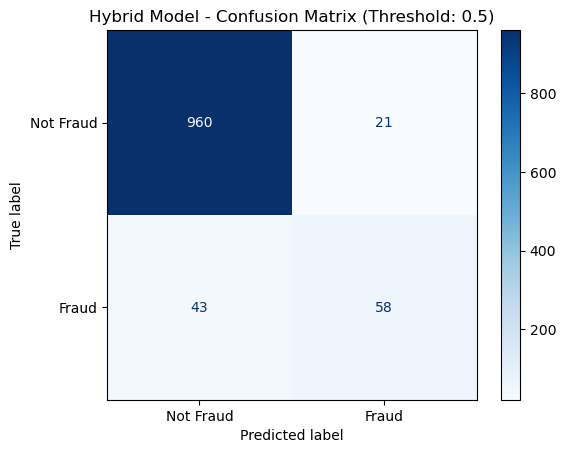

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier, IsolationForest
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Load the dataset
df = pd.read_csv('final_provider_dataset.csv')

# Convert PotentialFraud to binary (1 = Fraud, 0 = Not Fraud)
df['PotentialFraud'] = df['PotentialFraud'].map({'Yes': 1, 'No': 0})

# Drop non-numeric columns
df = df.drop(columns=['Provider'])

# Define features (X) and target (y)
X = df.drop(columns=['PotentialFraud'])
y = df['PotentialFraud']

# 🔹 Step 1: Train Isolation Forest for Anomaly Detection
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
df['Anomaly_Score'] = iso_forest.fit_predict(X)

# Convert anomaly labels (-1 = anomaly, 1 = normal) to binary (1 = anomaly, 0 = normal)
df['Anomaly_Flag'] = df['Anomaly_Score'].apply(lambda x: 1 if x == -1 else 0)

# 🔹 Step 2: Apply KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['KMeans_Cluster'] = kmeans.fit_predict(X)

# 🔹 Step 3: Use Enhanced Features with Anomaly Flags & Clustering
X['Anomaly_Flag'] = df['Anomaly_Flag']
X['KMeans_Cluster'] = df['KMeans_Cluster']

# Split into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features (important for some models, but not strictly required for tree-based models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 🔹 Step 4: Train Gradient Boosting Classifier (Supervised Model)
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)

# Predict probabilities
y_proba = gbc.predict_proba(X_test)[:, 1]

# Apply new threshold (adjust as needed)
threshold = 0.5
y_pred = (y_proba >= threshold).astype(int)

# 🔹 Step 5: Evaluate the Hybrid Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f"Hybrid Model (Supervised + Anomaly Detection) - Threshold: {threshold}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# 🔹 Step 6: Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Fraud', 'Fraud'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Hybrid Model - Confusion Matrix (Threshold: 0.5)")
plt.show()

# 🔹 Step 7: Save the updated dataset with clustering & anomaly detection
df.to_csv("final_provider_dataset_with_clusters.csv", index=False)


C:\Users\Chloe DeRouen\AppData\Local\Temp\ipykernel_27792\2038277665.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='KMeans_Cluster', y='PotentialFraud', estimator=np.mean, palette='coolwarm')


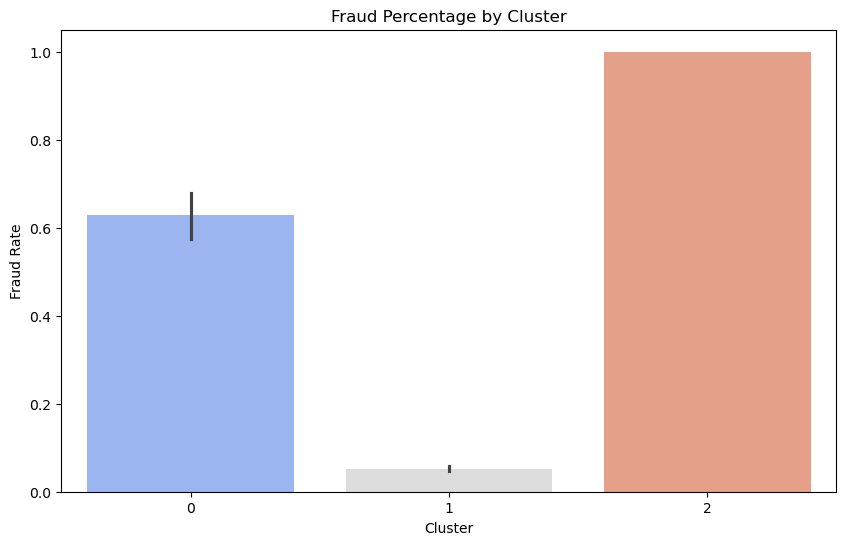

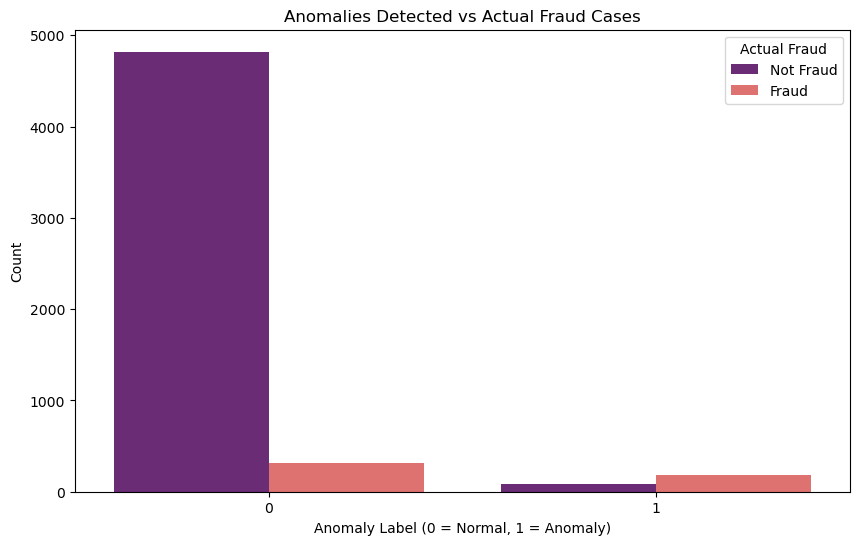

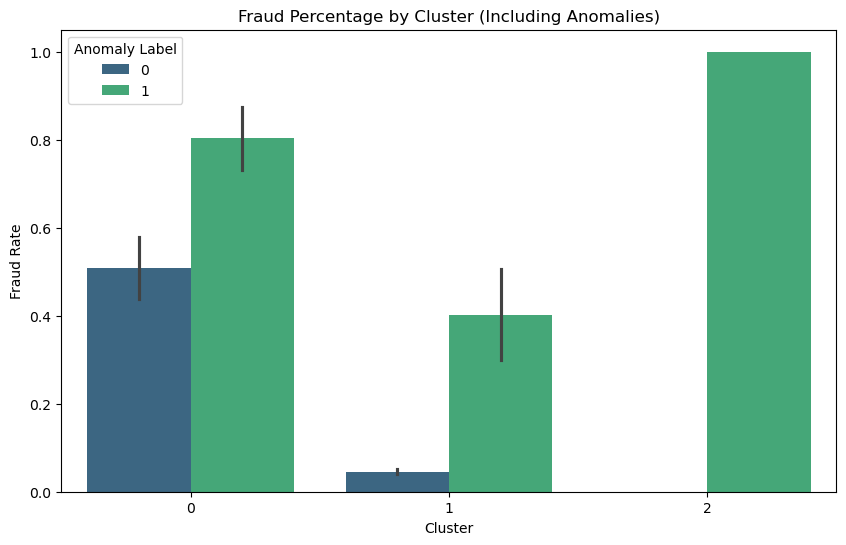

In [27]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the updated dataset with clustering & anomaly detection
df = pd.read_csv("final_provider_dataset_with_clusters.csv")

# --- 1️⃣ Fraud Distribution by Cluster ---
if 'KMeans_Cluster' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df, x='KMeans_Cluster', y='PotentialFraud', estimator=np.mean, palette='coolwarm')
    plt.title("Fraud Percentage by Cluster")
    plt.xlabel("Cluster")
    plt.ylabel("Fraud Rate")
    plt.show()

# --- 2️⃣ Anomaly Detection Results ---
if 'Anomaly_Flag' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df['Anomaly_Flag'], hue=df['PotentialFraud'], palette='magma')
    plt.title("Anomalies Detected vs Actual Fraud Cases")
    plt.xlabel("Anomaly Label (0 = Normal, 1 = Anomaly)")
    plt.ylabel("Count")
    plt.legend(title="Actual Fraud", labels=["Not Fraud", "Fraud"])
    plt.show()

# --- 3️⃣ Fraud Distribution Across Clusters (With Anomalies) ---
if 'KMeans_Cluster' in df.columns and 'Anomaly_Flag' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df, x='KMeans_Cluster', y='PotentialFraud', hue='Anomaly_Flag', palette='viridis')
    plt.title("Fraud Percentage by Cluster (Including Anomalies)")
    plt.xlabel("Cluster")
    plt.ylabel("Fraud Rate")
    plt.legend(title="Anomaly Label")
    plt.show()


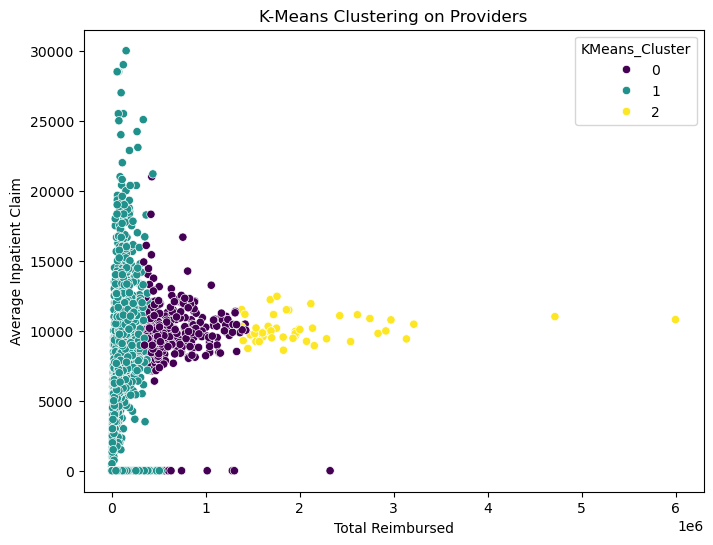

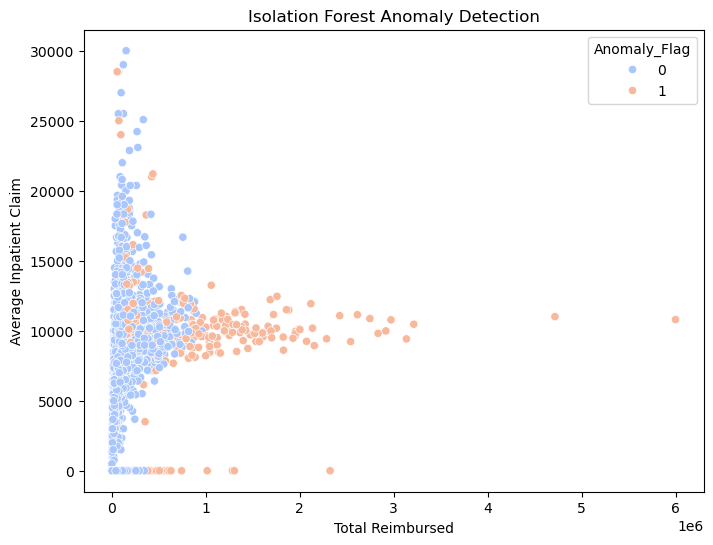

In [31]:
# Plot KMeans Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Total_Reimbursed'], y=df['Avg_IP_Claim'], hue=df['KMeans_Cluster'], palette='viridis')
plt.title("K-Means Clustering on Providers")
plt.xlabel("Total Reimbursed")
plt.ylabel("Average Inpatient Claim")
plt.show()

# Plot Anomalies from Isolation Forest
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Total_Reimbursed'], y=df['Avg_IP_Claim'], hue=df['Anomaly_Flag'], palette='coolwarm')
plt.title("Isolation Forest Anomaly Detection")
plt.xlabel("Total Reimbursed")
plt.ylabel("Average Inpatient Claim")
plt.show()

Hybrid DBSCAN + Isolation Forest Model (Supervised + Anomaly Detection) - Threshold: 0.5
Accuracy: 0.9409
Precision: 0.7467
Recall: 0.5545
F1 Score: 0.6364


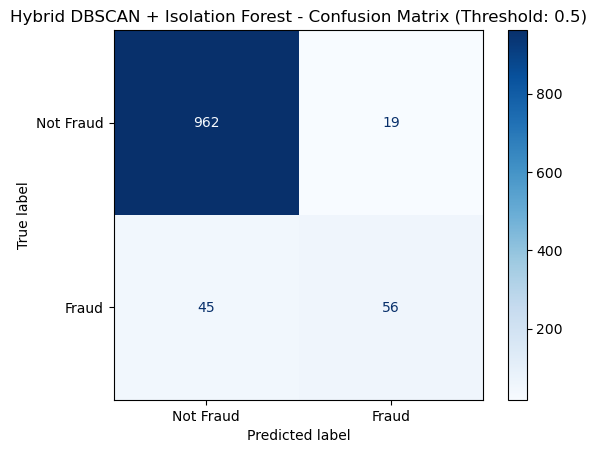

C:\Users\Chloe DeRouen\AppData\Local\Temp\ipykernel_27792\3225183884.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='DBSCAN_Cluster', y='PotentialFraud', estimator=np.mean, palette='coolwarm')


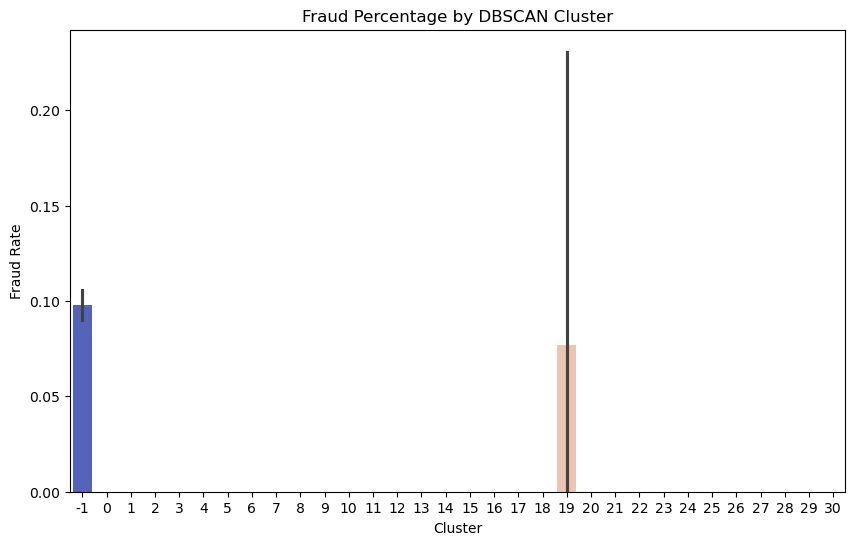

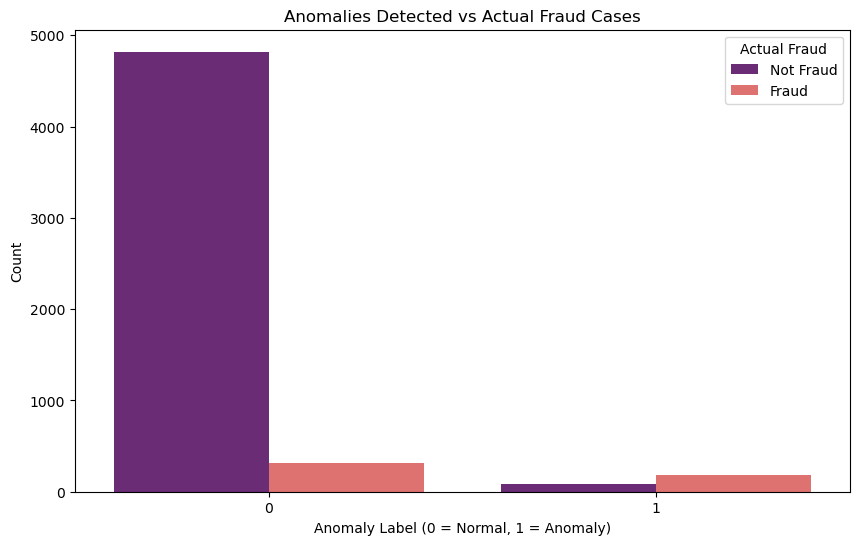

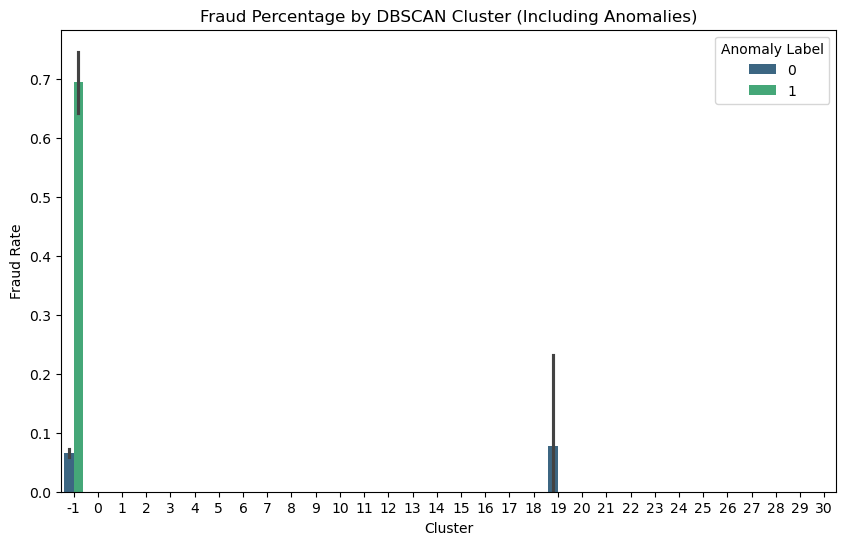

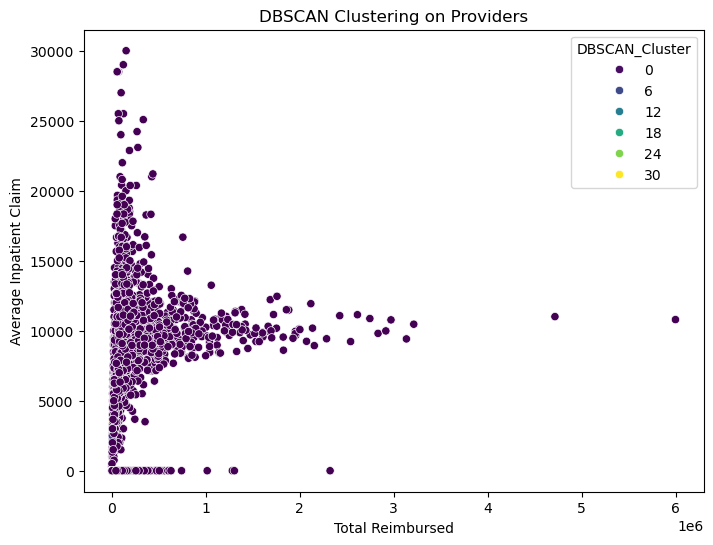

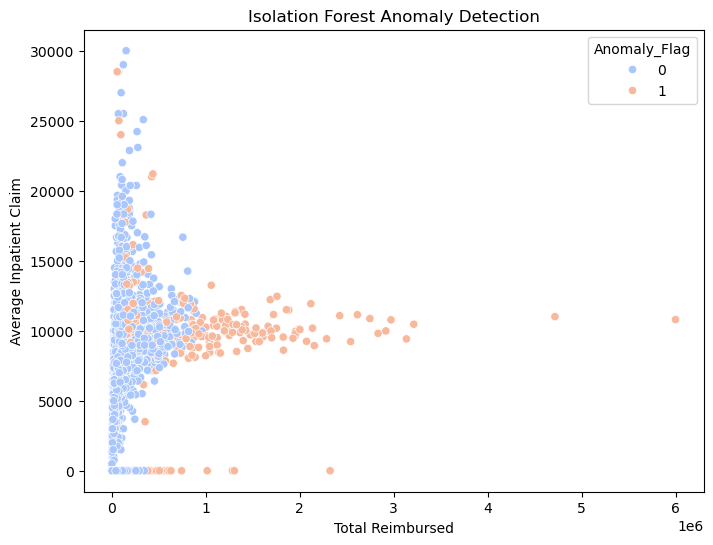

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier, IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Load the dataset
df = pd.read_csv('final_provider_dataset.csv')

# Convert PotentialFraud to binary (1 = Fraud, 0 = Not Fraud)
df['PotentialFraud'] = df['PotentialFraud'].map({'Yes': 1, 'No': 0})

# Drop non-numeric columns
df = df.drop(columns=['Provider'])

# Define features (X) and target (y)
X = df.drop(columns=['PotentialFraud'])
y = df['PotentialFraud']

# 🔹 Step 1: Train Isolation Forest for Anomaly Detection
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
df['Anomaly_Score'] = iso_forest.fit_predict(X)

# Convert anomaly labels (-1 = anomaly, 1 = normal) to binary (1 = anomaly, 0 = normal)
df['Anomaly_Flag'] = df['Anomaly_Score'].apply(lambda x: 1 if x == -1 else 0)

# 🔹 Step 2: Apply DBSCAN for Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # You can adjust `eps` and `min_samples` based on your data
df['DBSCAN_Cluster'] = dbscan.fit_predict(X)

# 🔹 Step 3: Use Enhanced Features with Anomaly Flags & Clustering
X['Anomaly_Flag'] = df['Anomaly_Flag']
X['DBSCAN_Cluster'] = df['DBSCAN_Cluster']

# Split into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features (important for some models, but not strictly required for tree-based models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 🔹 Step 4: Train Gradient Boosting Classifier (Supervised Model)
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)

# Predict probabilities
y_proba = gbc.predict_proba(X_test)[:, 1]

# Apply new threshold (adjust as needed)
threshold = 0.5
y_pred = (y_proba >= threshold).astype(int)

# 🔹 Step 5: Evaluate the Hybrid Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f"Hybrid DBSCAN + Isolation Forest Model (Supervised + Anomaly Detection) - Threshold: {threshold}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# 🔹 Step 6: Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Fraud', 'Fraud'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Hybrid DBSCAN + Isolation Forest - Confusion Matrix (Threshold: 0.5)")
plt.show()

# 🔹 Step 7: Save the updated dataset with clustering & anomaly detection
df.to_csv("final_provider_dataset_with_dbscan_clusters.csv", index=False)

# --- Visualizations (Optional) ---
# --- 1️⃣ Fraud Distribution by DBSCAN Cluster ---
if 'DBSCAN_Cluster' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df, x='DBSCAN_Cluster', y='PotentialFraud', estimator=np.mean, palette='coolwarm')
    plt.title("Fraud Percentage by DBSCAN Cluster")
    plt.xlabel("Cluster")
    plt.ylabel("Fraud Rate")
    plt.show()

# --- 2️⃣ Anomaly Detection Results ---
if 'Anomaly_Flag' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df['Anomaly_Flag'], hue=df['PotentialFraud'], palette='magma')
    plt.title("Anomalies Detected vs Actual Fraud Cases")
    plt.xlabel("Anomaly Label (0 = Normal, 1 = Anomaly)")
    plt.ylabel("Count")
    plt.legend(title="Actual Fraud", labels=["Not Fraud", "Fraud"])
    plt.show()

# --- 3️⃣ Fraud Distribution Across DBSCAN Clusters (With Anomalies) ---
if 'DBSCAN_Cluster' in df.columns and 'Anomaly_Flag' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df, x='DBSCAN_Cluster', y='PotentialFraud', hue='Anomaly_Flag', palette='viridis')
    plt.title("Fraud Percentage by DBSCAN Cluster (Including Anomalies)")
    plt.xlabel("Cluster")
    plt.ylabel("Fraud Rate")
    plt.legend(title="Anomaly Label")
    plt.show()

# Plot DBSCAN Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Total_Reimbursed'], y=df['Avg_IP_Claim'], hue=df['DBSCAN_Cluster'], palette='viridis')
plt.title("DBSCAN Clustering on Providers")
plt.xlabel("Total Reimbursed")
plt.ylabel("Average Inpatient Claim")
plt.show()

# Plot Anomalies from Isolation Forest
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Total_Reimbursed'], y=df['Avg_IP_Claim'], hue=df['Anomaly_Flag'], palette='coolwarm')
plt.title("Isolation Forest Anomaly Detection")
plt.xlabel("Total Reimbursed")
plt.ylabel("Average Inpatient Claim")
plt.show()
